<a href="https://www.kaggle.com/code/sadimrahmanbadhan/tesla-stock-price-prediction-linearregression?scriptVersionId=158611913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Implementation By: Sadim Rahman Badhan
# Importing essential modules
import numpy as np
import pandas as pd
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Path to the CSV file
datapath = "/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv"

# Loading the CSV file
df = pd.read_csv(datapath)

# Printing first 3 rows of the dataset
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800


Here:

    The date - "Date"

    The opening price of the stock - "Open"

    The high price of that day - "High"

    The low price of that day - "Low"

    The closed price of that day - "Close"

    The amount of stocks traded during that day - "Volume"

    The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "Adj[usted] Close"
    
 <blockquote> Source: https://www.kaggle.com/rpaguirre/tesla-stock-price </blockquote>
 <blockquote> Reference: https://www.kaggle.com/rishidamarla/tesla-stock-prediction-using-linear-regression </blockquote>


In [2]:
# Printing statistical information of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [3]:
# Checking for empty data fields in the dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Checking data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


# **Here**, 
# *Date* is a **categorical data** where most of the other columns are in floating point data type. Therefore, we will not be using the date column to train our model.

In [5]:
# Dropping date column from our dataset
df = df.drop(['Date'],axis=1)

# Now,
# We want to predict the closing/the last price of the stock based on the following features in out model:
# 1. Open
# 2. High
# 3. Low
# 4. Volume.
# 
# So, we will drop the Close and 'Adj Close' column since they contain same values.

In [6]:
# Creating a shadow copy
copydf = df.copy()

In [7]:
# Seperating Target variables and features
# Target Variable
y = df["Close"]

# Features
x = df.drop(["Close","Adj Close"],axis=1)

In [8]:
# Spliting the data in 80%, 20% for training and testing
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)

In [9]:
# Making the model using LinearRegression()
model = LinearRegression()

# Fiting the training data in the model
model.fit(xTrain,yTrain)

LinearRegression()

# Checking the accuracy of the model using the score() in sklearn which uses R2 (the coefficient of determination) method to check accuracy.

In [10]:
model.score(xTest,yTest)

0.9996845456089336

In [11]:
# Getting the intercept and Coefficients
print("Intercept: ",model.intercept_)
print("Coefficients: ")
for _ in model.coef_:
    print(_)

Intercept:  -0.04606869856115736
Coefficients: 
-0.6319230012704212
0.9147445814280443
0.7158854468023584
-4.2547278145121936e-08


In [12]:
# Making predictions using the predict() and xTest data
predictions = model.predict(xTest)

In [13]:
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':yTest})

In [14]:
print(comparison.head(15))

      Predicted Values  Actual Values
1811        349.440883     350.609985
2316        245.481879     247.100006
35           18.784292      18.770000
794         159.617096     161.839996
2243        189.667050     189.860001
1373        226.976979     227.070007
1672        270.448382     272.230011
1742        339.728889     341.010010
816         183.241258     185.240005
2115        342.414893     347.489990
92           24.521482      24.980000
956         194.703705     199.110001
1895        333.995840     336.410004
2187        283.340429     284.140015
1905        353.270326     352.790009


# Visualizing the data to inspect the relationship between the target and features and showing the best fit line using seaborn.regplot() 

<Axes: xlabel='Volume', ylabel='Close'>

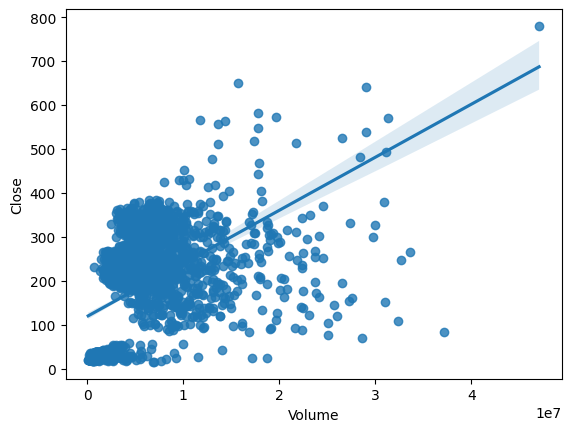

In [15]:
# Closing price vs the Volume
seaborn.regplot(data=copydf, x='Volume', y='Close')

<Axes: xlabel='Close', ylabel='Open'>

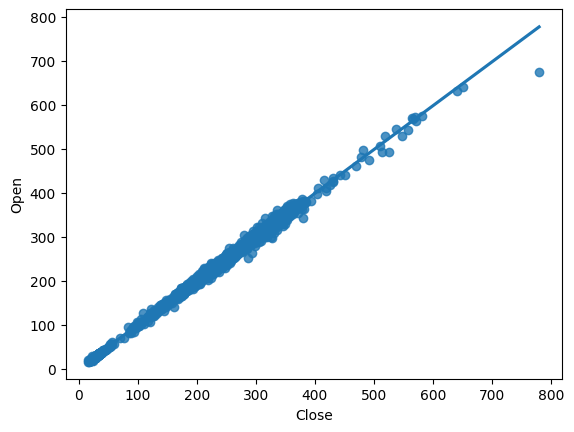

In [16]:
# Closing price vs Opening price
seaborn.regplot(data=copydf, x='Close', y='Open')

<Axes: xlabel='Close', ylabel='High'>

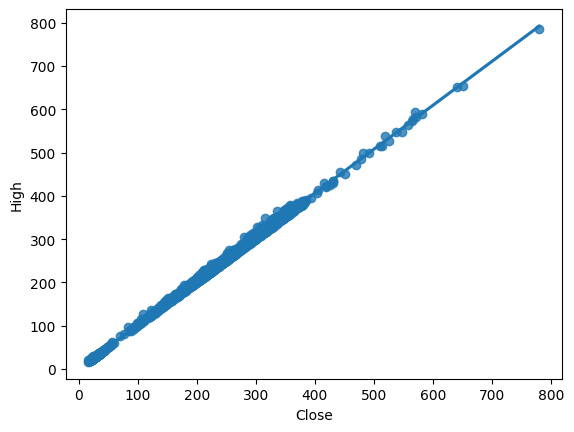

In [17]:
# Closing price vs High price
seaborn.regplot(data=copydf, x="Close", y='High')

<Axes: xlabel='Close', ylabel='Low'>

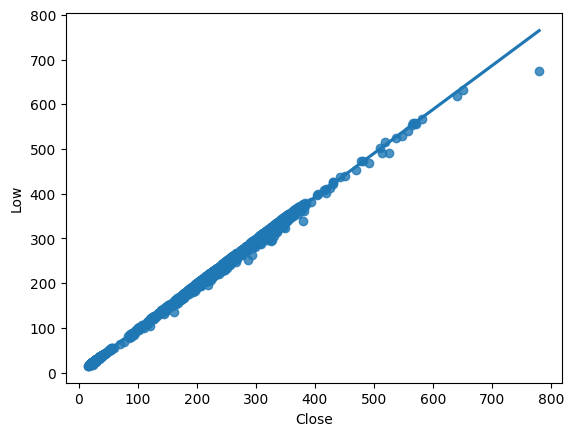

In [18]:
# Closing price vs Low price
seaborn.regplot(data=copydf, x='Close', y="Low")

In [19]:
# Serialization
joblib.dump(model, "stock-predictor-v2.job")

['stock-predictor-v2.job']